In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Championnat-2023.csv',sep=';',header=0)
df

,Nom,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,Total
0,Yannick,10,4,-1,5,-1,12,7,8,12,7,15,63
1,LaurentM,7,9,8,8,9,7,9,3,0,0,9,48
2,Jody,10,10,11,9,7,9,5,8,11,0,13,61
3,David,3,1,5,11,5,11,1,-3,9,0,14,43
4,Jacques,5,7,4,3,5,2,7,10,0,0,12,43
5,Serge,10,4,6,7,6,9,11,4,2,0,11,42
6,Bruno,3,6,3,4,9,2,8,7,4,0,11,46
7,Thao,8,10,1,8,0,0,0,0,0,0,13,26
8,M-C,4,-1,5,7,4,1,9,-3,9,0,13,26
9,Manu,-2,0,0,8,8,4,5,5,0,0,13,28


In [2]:
import pandas as pd

df = pd.read_csv('Championnat-2023.csv', sep=';', header=0)

results = {x: df.iloc[y].to_list() for y, x in enumerate(df['Nom'])}
results_10, record_2023 = {},{}

for key in results:
    
    results_10[key] = results[key][1:11]
    record_2023[key] = results[key][11:12]
    
record_2023 = {key: int(46 - value[0]) for key, value in record_2023.items()}

print(results_10)
print(record_2023)

{'Yannick': [10, 4, -1, 5, -1, 12, 7, 8, 12, 7], 'LaurentM': [7, 9, 8, 8, 9, 7, 9, 3, 0, 0], 'Jody': [10, 10, 11, 9, 7, 9, 5, 8, 11, 0], 'David': [3, 1, 5, 11, 5, 11, 1, -3, 9, 0], 'Jacques': [5, 7, 4, 3, 5, 2, 7, 10, 0, 0], 'Serge': [10, 4, 6, 7, 6, 9, 11, 4, 2, 0], 'Bruno': [3, 6, 3, 4, 9, 2, 8, 7, 4, 0], 'Thao': [8, 10, 1, 8, 0, 0, 0, 0, 0, 0], 'M-C': [4, -1, 5, 7, 4, 1, 9, -3, 9, 0], 'Manu': [-2, 0, 0, 8, 8, 4, 5, 5, 0, 0], 'Yves': [8, -4, -3, -3, 6, 3, 7, 3, 0, 0], 'Caroline': [3, 7, 0, 4, 2, 0, 2, 0, 0, 0], 'Pascal': [4, 7, -1, 6, 6, 11, 6, 0, 0, 0], 'Jay': [6, 2, 6, 7, 5, 2, 0, 0, 0, 0], 'Daniel': [1, -2, 7, -3, 1, -2, 2, 8, -1, -1]}
{'Yannick': 31, 'LaurentM': 37, 'Jody': 33, 'David': 32, 'Jacques': 34, 'Serge': 35, 'Bruno': 35, 'Thao': 33, 'M-C': 33, 'Manu': 33, 'Yves': 35, 'Caroline': 39, 'Pascal': 35, 'Jay': 37, 'Daniel': 36}


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('Championnat-2023.csv', sep=';', header=0)

name, sum_values, mean_values, std_values, record = [], [], [], [], []

for index, row in df.iterrows():
    
    name.append(row["Nom"])
    values = row[1:11]
    sum_values.append(np.sum(values))
    mean_values.append(np.mean(46 - np.array(values)))
    std_values.append(np.std(46 - np.array(values)))
    record.append(46 - row["C11"])

df_results_2023 = pd.DataFrame([name,sum_values,mean_values,std_values,record]).T
df_results_2023.columns=['Nom','Total','Moyenne','Ecart-type','Record']

df_results_2023 = df_results_2023.sort_values(['Total','Record'], ascending=[False,True], ignore_index=True)
df_results_2023['Position'] = [x for x in range(1,len(df_results_2023)+1)]

print(df_results_2023)

         Nom Total Moyenne Ecart-type Record  Position
0       Jody    80    38.0   3.193744     33         1
1    Yannick    63    39.7   4.428318     31         2
2   LaurentM    60    40.0   3.435113     37         3
3      Serge    59    40.1   3.330165     35         4
4      Bruno    46    41.4   2.690725     35         5
5      David    43    41.7   4.561798     32         6
6    Jacques    43    41.7   3.034798     34         7
7     Pascal    39    42.1   3.780212     35         8
8        M-C    35    42.5   3.956008     33         9
9       Manu    28    43.2   3.458323     33        10
10       Jay    28    43.2   2.749545     37        11
11      Thao    27    43.3   3.950949     33        12
12  Caroline    18    44.2   2.227106     39        13
13      Yves    17    44.3   4.148494     35        14
14    Daniel    10    45.0   3.577709     36        15


## Histogrammes

In [4]:
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np

df_long = pd.melt(df, id_vars =['Nom'], value_vars =df.loc[:,'C1':'C11'],var_name='C', value_name='score')
df_long['score'] = 46 - df_long['score']

def histo(data): 
    
    scores = data['score'].value_counts().sort_index()
    scores_temp = scores[scores.index != 46]
    #print(scores_temp.values.tolist())
    fig = px.bar(scores_temp , x=scores_temp.index, y=scores_temp, template="simple_white", title=data['Nom'].iloc[0])
    fig.update_xaxes(nticks=18,dtick=1)
    fig.update_yaxes(dtick=1)
    fig.show()
    #fig2 = ff.create_distplot([scores_temp.index.tolist()], ['values'])
    #fig2.show()

#histogramme avec tous les joueurs
df_total = df_long
#df_total['Nom'] = 'Total'
histo(df_total)

#histogrammes par joueur
noms = df['Nom']
joueurs = pd.DataFrame(noms)
df_means = pd.DataFrame()

for joueur in joueurs['Nom']:
    
    df_long_joueur = df_long[(df_long['Nom'] == joueur) & (df_long['score'] != 46)]
    df_mean_joueur = pd.DataFrame()
    df_mean_joueur['mean'] = df_long_joueur.mean()
    df_mean_joueur['var'] = df_long_joueur.var()
    df_mean_joueur['std'] = df_long_joueur.std()
    df_mean_joueur['Mediane'] = df_long_joueur.quantile(0.5)
    df_mean_joueur['Q1'] = df_long_joueur.quantile(0.25)
    df_mean_joueur['Q3'] = df_long_joueur.quantile(0.75)
    df_mean_joueur['indice'] = df_mean_joueur['Mediane'] - (df_mean_joueur['Q3']-df_mean_joueur['Q1'])/2
    df_mean_joueur['joueur'] = joueur
    df_means = df_means.append(df_mean_joueur, ignore_index=True)

    #histo(df_long_joueur)
df_means = df_means.sort_values('indice').reset_index()
print(df_means)
df_means.to_csv('results-stats.csv', encoding='utf-8')

#fig2 = px.histogram(df_total, x="score")

df_total = df_total[df_total['score'] != 46]
fig2 = ff.create_distplot([df_total['score']], ['total'])
fig2.update_xaxes(nticks=18,dtick=1)
fig2.update_yaxes(dtick=1)
fig2.show()


fig3 = px.box(df_long.query('score != 46'), x="Nom", y="score", notched=True)
fig3.show()

fig4 = px.strip(df_long.query('score != 46'), x="Nom", y="score")
fig4.show()


    index       mean        var       std  ...     Q1     Q3  indice    joueur
0       2  36.700000   5.122222  2.263233  ...  35.25  37.75  35.250      Jody
1       0  38.909091  26.490909  5.146932  ...  35.00  41.50  35.750   Yannick
2       3  40.300000  29.344444  5.417051  ...  35.50  44.50  36.500     David
3       5  39.000000  10.000000  3.162278  ...  36.25  41.50  36.875     Serge
4       1  38.333333   3.750000  1.936492  ...  37.00  39.00  37.000  LaurentM
5       7  38.000000  19.500000  4.415880  ...  36.00  38.00  37.000      Thao
6      10  42.888889  29.361111  5.418589  ...  39.00  49.00  38.000      Yves
7       8  41.200000  24.177778  4.917090  ...  37.50  44.25  38.125       M-C
8      13  40.714286   6.571429  2.563480  ...  39.50  42.50  38.500       Jay
9       6  40.300000   8.900000  2.983287  ...  38.25  42.75  38.750     Bruno
10     12  39.750000  14.785714  3.845220  ...  38.00  40.50  38.750    Pascal
11      9  40.142857  21.142857  4.598136  ...  38.0

In [5]:
import numpy as np
import pandas as pd

simulate = []
n = 10000

freq = np.zeros((len(df_means), len(df_means)))  # Initialize freq as a numpy array

for index, row in df_means.iterrows():
    
    random_numbers = np.random.uniform(row["mean"]- 2*row["std"], row["mean"]+ 2*row["std"], n)
    simulate.append(random_numbers)
    
for i in range(len(df_means)):
    for j in range(len(df_means)):
        results = (simulate[i] < simulate[j])
        freq[i,j] = round((np.count_nonzero(results))/n*100,2)
    
#print(freq)
#print(type(freq))

df_results = pd.DataFrame(freq, columns = df_means['joueur'], index = df_means['joueur'] )
print(df_results)
#df_results.to_csv('results.csv', encoding='utf-8')

joueur     Jody  Yannick  David  Serge  ...   Manu  Jacques  Caroline  Daniel
joueur                                  ...                                  
Jody       0.00    60.29  66.48  68.20  ...  68.72    73.40     90.40   88.37
Yannick   39.71     0.00  57.33  51.43  ...  56.28    54.91     64.52   73.68
David     33.52    42.67   0.00  43.80  ...  48.91    47.10     56.47   67.03
Serge     31.80    48.57  56.20   0.00  ...  56.21    56.35     71.38   77.11
LaurentM  32.76    52.53  59.57  55.64  ...  60.58    62.05     82.99   81.90
Thao      43.47    54.80  61.90  57.08  ...  61.41    61.59     72.38   79.22
Yves      21.78    33.30  39.30  32.38  ...  37.54    36.29     45.68   56.32
M-C       27.28    39.27  46.37  38.90  ...  44.49    43.47     53.39   64.18
Jay       17.80    41.79  48.88  36.82  ...  47.14    43.58     61.08   69.43
Bruno     22.38    42.57  50.67  40.17  ...  49.62    47.29     63.16   71.36
Pascal    31.06    46.09  53.49  46.14  ...  52.85    51.28     

In [6]:
import numpy as np
import pandas as pd

def simulation(k,n):
    
    simulate = []
    
    freq = np.zeros((len(df_means), len(df_means)))  # Initialize freq as a numpy array

    for index, row in df_means.iterrows():
        R = np.random.normal(row["mean"], row["std"], (k,n))
        #R = np.round(R)
        simulate.append(R)
    #print(simulate)  

    for i in range(len(df_means)):
        for j in range(len(df_means)):
            results = (simulate[i] < simulate[j])
            freq[i,j] = round((np.count_nonzero(results))/(k*n)*100,2)
    
    return freq

simulation_matrix = np.zeros((len(df_means),len(df_means)))
rep = 10000
for s in range(rep):
    simulation_matrix = simulation_matrix + simulation(1,1)
    simulation_matrix_mean = simulation_matrix / rep
    
simulation_final = np.round(simulation_matrix_mean)
print(simulation_final) 
    
df_results = pd.DataFrame(simulation_final, columns = df_means['joueur'], index = df_means['joueur'] )
print(df_results)
#df_results.to_csv('results.csv', encoding='utf-8')

[[ 0. 65. 73. 73. 71. 61. 85. 80. 88. 83. 75. 75. 79. 95. 93.]
 [35.  0. 57. 51. 46. 45. 70. 62. 62. 59. 55. 57. 56. 69. 77.]
 [27. 43.  0. 42. 36. 37. 63. 55. 52. 50. 46. 49. 47. 60. 71.]
 [27. 49. 58.  0. 43. 43. 73. 65. 66. 62. 56. 58. 58. 76. 83.]
 [29. 54. 64. 57.  0. 48. 78. 70. 76. 71. 62. 64. 66. 88. 89.]
 [39. 55. 63. 57. 52.  0. 76. 68. 70. 67. 61. 63. 62. 78. 83.]
 [15. 30. 37. 27. 22. 24.  0. 40. 35. 34. 32. 35. 32. 43. 57.]
 [20. 38. 45. 35. 30. 32. 60.  0. 46. 45. 41. 44. 41. 55. 68.]
 [12. 38. 48. 34. 24. 30. 65. 54.  0. 47. 42. 46. 42. 63. 75.]
 [17. 41. 50. 38. 29. 33. 66. 55. 53.  0. 45. 49. 46. 65. 76.]
 [25. 45. 54. 44. 38. 39. 68. 59. 58. 55.  0. 52. 52. 68. 77.]
 [25. 43. 51. 42. 36. 37. 65. 56. 54. 51. 48.  0. 49. 63. 74.]
 [21. 44. 53. 42. 34. 38. 68. 59. 58. 54. 48. 51.  0. 68. 78.]
 [ 5. 31. 40. 24. 12. 22. 57. 45. 37. 35. 32. 37. 32.  0. 68.]
 [ 7. 23. 29. 17. 11. 17. 43. 32. 25. 24. 23. 26. 22. 32.  0.]]
joueur    Jody  Yannick  David  Serge  ...  Manu  Jacq

## Moyenne pondérée

In [7]:
import numpy as np

scores  = df_long.groupby('score').count()
scores ['total'] = scores.index
scores_temp = scores[scores['total'] != 46]

weighted_average = np.average(a=scores_temp['total'], weights=scores_temp['C'])
print("Weighted Mean:", weighted_average)

Weighted Mean: 40.18181818181818


## Médiane pondérée

In [8]:

scores_temp['cumulative_weights'] = scores_temp['C'].cumsum()
total_weight = scores_temp['C'].sum()
median_position = total_weight / 2
weighted_median = scores_temp.loc[scores_temp['cumulative_weights'] >= median_position, 'total'].iloc[0]

print("Weighted Median:", weighted_median)

Weighted Median: 40


## Histogramme des scores

<AxesSubplot: >

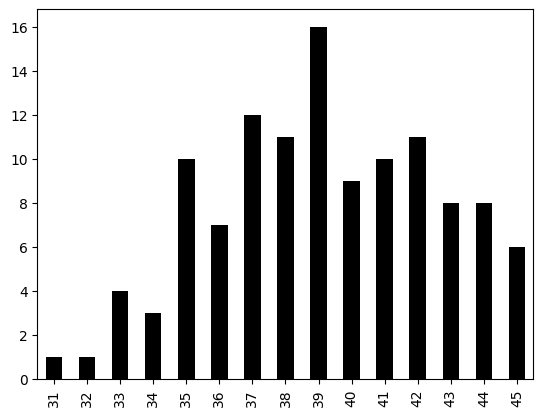

In [9]:
#T = df_long[df_long['score'] < 46]
T = df_long.query('score < 46')
M = T['score'].value_counts().sort_index()
m = T.mean()

M.plot.bar(color='black')



## Fit to normal distribution

          Nom    C  score
0     Yannick   C1     36
1    LaurentM   C1     39
2        Jody   C1     36
3       David   C1     43
4     Jacques   C1     41
..        ...  ...    ...
160      Yves  C11     35
161  Caroline  C11     39
162    Pascal  C11     35
163       Jay  C11     37
164    Daniel  C11     36

[117 rows x 3 columns]
39.17094017094017 3.336640918701338


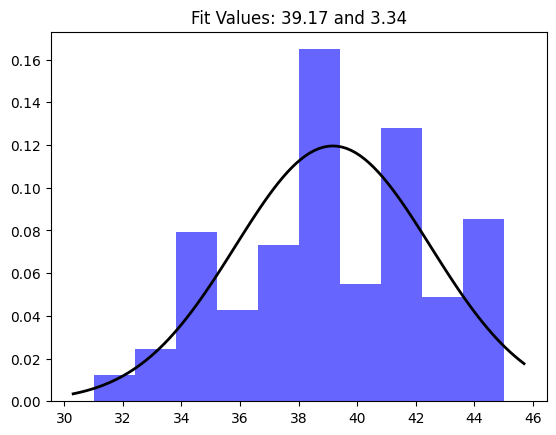

[[41.76480122]]


In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to
# the data:
# mean and standard deviation
print(T)
mu, std = norm.fit(T['score'])
print(mu,std)
# Plot the histogram.
plt.hist(T['score'], bins=10, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

R = np.random.normal(mu, std, (1,1))
print(R)

[34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]


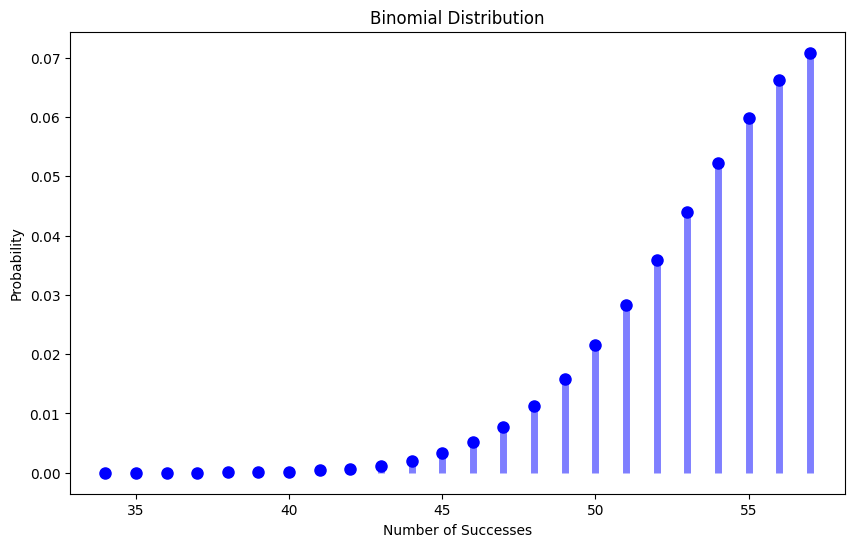

In [11]:
from scipy.stats import binom

# Fit to binomial distribution
n = len(T['score'])
p = 0.5

# Plot the PDF
x = np.arange(34, 58)
print(x)
plt.figure(figsize=(10, 6))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8)
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.show()


## Modèle binomial

0.24481837606837606


<BarContainer object of 24 artists>

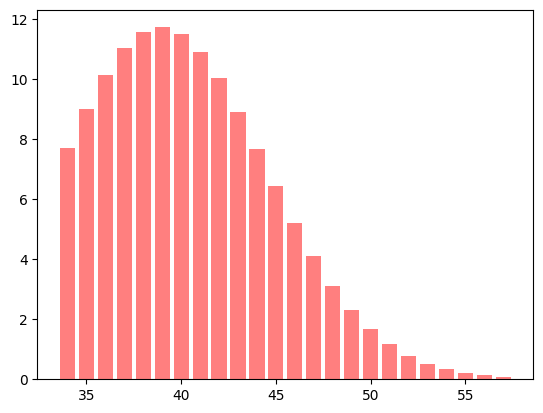

In [12]:
import matplotlib.pyplot as pl
from scipy.stats import binom

n = (len(T))
n2=160
print(m[0]/n2)

X = binom(n2, (m[0]/n2))
#X = binom(n2, 0.22)
E = [160 * X.pmf(k) for k in range(34,58)]
pl.bar(range(34,58), E, color ='red', alpha=0.5)


In [13]:

EX = df_long.query('Nom == "Yannick"').mean()  / m[0]
EY = df_long.query('Nom == "Daniel"').mean() / m[0]

print(EX, EY)

X = binom(160, (EX/160))
Y = binom(160, (EY/160))

s = 0
for i in range(24):
    s = s + X.pmf(i) * Y.pmf(i)

print(float(s))

score    0.993315
dtype: float64 score    1.127923
dtype: float64
0.2970653807106749


### Create a Density Plot of a Binomial Distribution

To create a density plot of a binomial distribution, we can use the `create_distplot` function from the `plotly` library. The `create_distplot` function takes two arguments: the number of trials (`n`) and the probability of success (`p`).

Here is an example of how to create a density plot of a binomial distribution with 100 trials and a success probability of 0.5:

```python
import plotly.figure_factory as ff

n = 100
p = 0.5

data = [np.random.binomial(n, p) for _ in range(1000)]

fig = ff.create_distplot([data], ['Binomial Distribution'], show_hist=False)
fig.show()
```

You can adjust the values of `n` and `p` to create different binomial distributions.


In [14]:
import plotly.figure_factory as ff

n = 160
p = 0.2

data = [np.random.binomial(n, p) for _ in range(1000)]

fig = ff.create_distplot([data], ['Binomial Distribution'], show_hist=True)
fig.show()